In [2]:
#install.packages('arules')

In [1]:
# Apriori

# Data Preprocessing

library(arules)
dataset = read.csv('Market_Basket_Optimisation.csv', header = FALSE)


Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [4]:
dataset

V1                V2                V3                V4              
1    shrimp            almonds           avocado           vegetables mix  
2    burgers           meatballs         eggs                              
3    chutney                                                               
4    turkey            avocado                                             
5    mineral water     milk              energy bar        whole wheat rice
6    low fat yogurt                                                        
7    whole wheat pasta french fries                                        
8    soup              light cream       shallot                           
9    frozen vegetables spaghetti         green tea                         
10   french fries                                                          
11   eggs              pet food                                            
12   cookies                                                               
13   turkey            burgers           mineral water     eggs            
14   spaghetti         champagne         cookies                           
15   mineral water     salmon                                              
16   mineral water                                                         
17   shrimp            chocolate         chicken           honey           
18   turkey            eggs                                                
19   turkey            fresh tuna        tomatoes          spaghetti       
20   meatballs         milk              honey             french fries    
21   red wine          shrimp            pasta             pepper          
22   rice              sparkling water                                     
23   spaghetti         mineral water     ham               body spray      
24   burgers           grated cheese     shrimp            pasta           
25   eggs                                                                  
26   parmesan cheese   spaghetti         soup              avocado         
27   ground beef       spaghetti         mineral water     milk            
28   sparkling water                                                       
29   mineral water     eggs              chicken           chocolate       
30   frozen vegetables spaghetti         yams              mineral water   
...  ...               ...               ...               ...             
7472 mineral water     chocolate                                           
7473 chocolate         grated cheese     mineral water     olive oil       
7474 whole wheat rice  cake              cottage cheese                    
7475 turkey            shrimp            pasta             mineral water   
7476 turkey            mineral water     cooking oil       chocolate       
7477 tomatoes          tomato sauce      spaghetti         mineral water   
7478 tomato juice                                                          
7479 turkey            ground beef       mineral water     chocolate       
7480 shrimp            pasta             mineral water     olive oil       
7481 frozen vegetables french wine       pancakes          french fries    
7482 chocolate         shrimp            pasta             spaghetti       
7483 chocolate                                                             
7484 fresh tuna        parmesan cheese   whole wheat pasta french wine     
7485 cookies           energy drink                                        
7486 parmesan cheese   champagne         white wine                        
7487 red wine          tomato sauce      spaghetti         chocolate       
7488 soup              milk                                                
7489 eggs              whole wheat rice                                    
7490 brownies                                                              
7491 herb & pepper     spaghetti         low fat yogurt                    
7492 herb & pepper                                   

In [5]:
dataset = read.transactions('Market_Basket_Optimisation.csv', sep = ',', rm.duplicates = TRUE)


distribution of transactions with duplicates:
1 
5 


In [6]:
summary(dataset)


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

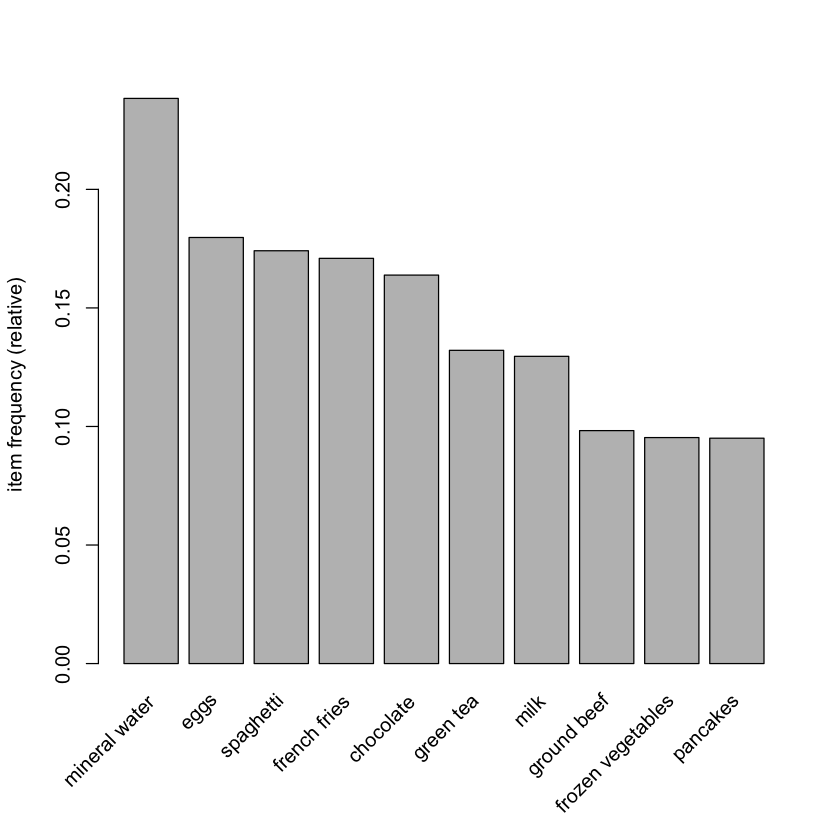

In [7]:
itemFrequencyPlot(dataset, topN = 10)



In [8]:
# Training Apriori on the dataset
rules = apriori(data = dataset, parameter = list(support = 0.004, confidence = 0.2))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [811 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [9]:
# Visualising the results
inspect(sort(rules, by = 'lift')[1:10])

     lhs                       rhs                 support confidence     lift count
[1]  {light cream}          => {chicken}       0.004532729  0.2905983 4.843951    34
[2]  {pasta}                => {escalope}      0.005865885  0.3728814 4.700812    44
[3]  {pasta}                => {shrimp}        0.005065991  0.3220339 4.506672    38
[4]  {eggs,                                                                         
      ground beef}          => {herb & pepper} 0.004132782  0.2066667 4.178455    31
[5]  {whole wheat pasta}    => {olive oil}     0.007998933  0.2714932 4.122410    60
[6]  {herb & pepper,                                                                
      spaghetti}            => {ground beef}   0.006399147  0.3934426 4.004360    48
[7]  {herb & pepper,                                                                
      mineral water}        => {ground beef}   0.006665778  0.3906250 3.975683    50
[8]  {tomato sauce}         => {ground beef}   0.005332622  0.377